In [1]:
# Copied over
import read_data
import numpy as np
from matplotlib import pyplot as plt
import copy

from scipy.cluster.vq import vq, kmeans, whiten
import execute as exe

In [2]:
# Copied over
(calls, allbases, demands, times, calls_latlong) = read_data.populate_data()

allbases = np.delete(np.array(allbases), 2, 1) # Array of all the bases
demands = np.delete(np.array(demands), 2, 1)   # Array of all the demands
times = np.array(times)                        # Array of all the times
calls_latlong = np.array(calls_latlong)        # Array of location of the calls

In [3]:
# Generate random set of bases.

times_copy = copy.deepcopy(times)
choose = 1
count = 0
iters = 0

print(times) 
print("\n\n")
min_row = np.min(times_copy, axis=0)
print(min_row)
for row in times:

    for x in range(np.shape(min_row)[0]):
        if row[x] == min_row[x]:
            print("Found a common element at position %d" %x)




[[ 1709.  1583.  1851. ...,   294.  1349.   984.]
 [ 1801.  1676.  1944. ...,   292.  1441.  1076.]
 [ 1819.  1693.  1961. ...,   197.  1459.  1094.]
 ..., 
 [ 1308.  1372.  1225. ...,  1838.  1242.   905.]
 [ 1143.  1019.  1292. ...,  1607.   799.   593.]
 [  641.   531.   619. ...,  1977.   423.  1130.]]



[ 202.   50.  114.   71.   40.   90.   75.  137.   42.   89.  124.   76.
   52.  141.  322.  337.   51.   76.   36.   67.   99.  140.   18.  113.
   35.   43.   97.  161.    1.   68.  112.   20.  330.   89.  197.   34.
   56.   68.   89.   37.   34.   67.   58.  123.   83.   38.   69.    0.
  255.  456.  167.   52.   56.   66.    0.    8.  167.   69.   65.  106.
  140.   27.   63.   99.   94.  104.   19.   52.  162.   37.    2.  486.
  246.  115.   24.  405.  143.   68.  156.   41.   31.  120.    6.   95.
   45.   86.  154.  230.  113.   50.   68.   81.   84.   66.   89.   95.
   16.   78.   16.   68.]
Found a common element at position 86
Found a common element at position 37
Fou

# Learned
I feel like I just waited a ton of time because I found out what numpy.min really does...

In [12]:
times_copy = copy.deepcopy(times)

# In order to rank each row, I need to make my own metric.

costs = [np.sum(row) for row in times]

print(np.min(costs), np.max(costs), np.std(costs), np.mean(costs), np.var(costs))

d = [('index', int), ('cost', float)]
costs = np.array([(i, costs[i]) for i in range(np.shape(times)[0])], dtype=d)

85971.0 209302.0 18264.4812571 118390.952528 333591275.591


array([(0,  119174.), (1,  128299.), (2,  129961.), (3,  138175.),
       (4,  132279.), (5,  128015.), (6,  138502.), (7,  120069.)],
      dtype=[('index', '<i8'), ('cost', '<f8')])

In [13]:
# Find the bases with the least times

sorted_costs = np.sort(costs, kind='mergesort', order='cost')
ind = [t[0] for t in sorted_costs[0:8]]
sorted_costs[0:8]

array([( 59,  85971.), (425,  87279.), (891,  87309.), (115,  87846.),
       (280,  88180.), (111,  88741.), ( 26,  88862.), (122,  88987.)],
      dtype=[('index', '<i8'), ('cost', '<f8')])

In [14]:

#ind = np.random.randint(0, allbases.shape[0], 8)
bases = allbases[ind,:]
points = np.delete(allbases, ind, 0)
distance = times[ind,:]


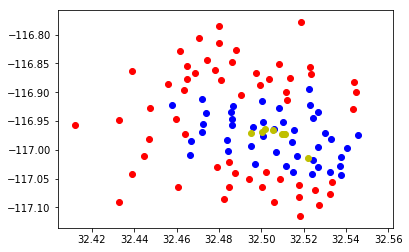

In [7]:
r1 = 600
r1_coverage = np.any(distance < r1, 0)
r1_covered = np.nonzero(r1_coverage)
r1_exposed = np.nonzero(np.logical_not(r1_coverage))

plt.figure()
plt.scatter(demands[r1_covered,0],demands[r1_covered,1], c='b')
plt.scatter(demands[r1_exposed,0],demands[r1_exposed,1], c='r')
plt.scatter(bases[:,0],bases[:,1], c='y')
plt.show()

It looks like there is a lot of overlap here. Maybe each time I pick a single base, I will then go into the times and delete the rows that are covered by this base within r1. Then, resort it. Do this 8 times to find the starting set of 8 bases. 

In [8]:
# The largest shortest distance 
print ("Distance: \n", distance)
print ("Min Distance: \n", np.min(distance,0))
np.max(np.min(distance, 0))

Distance: 
 [[  980.   854.  1122.  1222.   464.   476.   773.   824.  1061.  1090.
    310.   495.   521.   725.  1410.  1223.   365.   544.   690.   628.
    166.   216.   755.   587.   889.   867.   546.   620.   967.   882.
    931.   911.   728.   713.   763.   655.   509.   587.   140.   215.
   1303.  1239.  1401.  1358.  1345.  1696.   346.  1004.  1494.  1662.
    589.   800.   579.   778.   587.  1106.  1057.   982.   835.   740.
    780.   954.   713.  1040.   907.   726.  1009.   683.   749.  1013.
    471.  1028.  1317.  1166.  1096.  1881.  1197.  1123.   883.   537.
   1127.   281.  1029.   568.  1218.  1648.  1142.   740.   707.   779.
    219.   724.  1457.   232.   610.  1201.   937.  1577.   620.   557.]
 [ 1005.   882.  1155.  1255.   484.   498.   755.   806.  1210.  1204.
    291.   479.   546.   763.  1437.  1256.   492.   634.   715.   654.
    191.   311.   772.   612.   911.   979.   525.   592.   935.   851.
    906.   894.   822.   685.   741.   628.   489. 

1858.0

In [9]:
ambulances = np.array([[1/4,1/4,1/4,1/4],[1/3,0,1/3,1/3]]).dot(bases[[0,3,5,7],:]) 
ambulances

array([[  32.50477675, -116.96779825],
       [  32.50629733, -116.96728167]])

found
found
[[9 8 7 6 5]
 [1 2 3 4 5]]
[[1 2 3 4 5]
 [9 8 7 6 5]]
